<a href="https://colab.research.google.com/github/xHexlabx/AI-models/blob/main/Auto%20Encoder/Basic_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Autoencoder


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
x = np.eye(8)

In [ ]:
print(x)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
inputs = tf.keras.Input(shape  = x.shape[1])

In [ ]:
encoder = tf.keras.layers.Dense(6 , activation = 'sigmoid' )
encoder = tf.keras.layers.Dense(3 , activation = 'sigmoid')

In [ ]:
decoder = tf.keras.layers.Dense(x.shape[1] , activation = 'sigmoid')

In [ ]:
outputs = decoder(encoder(inputs))

In [ ]:
model = tf.keras.Model(inputs , outputs)

In [ ]:
model.compile(loss = "mse" , optimizer = 'adam')

In [ ]:
model.fit(x  , x , epochs = 8000 , verbose  = 0)

In [ ]:
z = model(x)

In [ ]:
print(x)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print(np.round(z))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
print(np.round(encoder(x)))

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 0.]
 [0. 1. 1.]
 [0. 1. 0.]
 [1. 0. 1.]
 [1. 0. 0.]
 [1. 1. 0.]]


# Mnist Autoencoder


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
datasets = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
(xtrain , ytrain) , (xtest , ytest) = datasets

In [ ]:
xtrain = xtrain[ : , : , : , None] / 255.0
xtest = xtest[ : , : , : , None] / 255.0

In [ ]:
xtrain = tf.image.resize(xtrain ,(32 , 32))
xtest = tf.image.resize(xtest , (32 , 32))

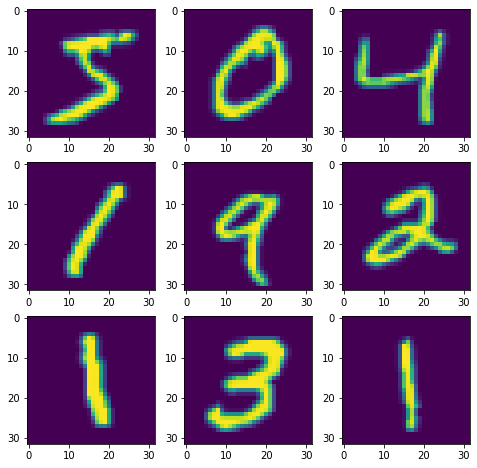

In [ ]:
fig = plt.figure(figsize=(8 , 8))
for i in range(9) : 
    fig.add_subplot(3 , 3 , i + 1) 
    plt.imshow(np.reshape(xtrain[i] , (32 , 32)))

In [ ]:
xtrain = np.reshape(xtrain , (60000 , 32 * 32) )
xtest = np.reshape(xtest , (10000 , 32 * 32))

In [ ]:
print(xtrain.shape , xtest.shape)

(60000, 1024) (10000, 1024)


In [ ]:
# model 1024 - 512 - 256 - 128 - 32 - 16 - 32 - 128 - 256 - 512 - 1024

In [ ]:
#encoder
encoder_inputs = tf.keras.Input(shape = (1024 , ))

encoded = tf.keras.layers.Dense(512 , activation = 'relu')(encoder_inputs)
encoded = tf.keras.layers.Dense(256 , activation = 'relu')(encoded)
encoded = tf.keras.layers.Dense(128 , activation = 'relu')(encoded)
encoded = tf.keras.layers.Dense(64, activation = 'relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation = 'relu')(encoded)
encoded = tf.keras.layers.Dense(16 , activation = 'relu')(encoded)

encoder  = tf.keras.Model(encoder_inputs , encoded)

In [ ]:
#decoder
decoder_inputs = tf.keras.Input(shape = (16 , ))

decoded = tf.keras.layers.Dense(32, activation = 'relu')(decoder_inputs)
decoded = tf.keras.layers.Dense(64, activation = 'relu')(decoded)
decoded = tf.keras.layers.Dense(128, activation = 'relu')(decoded)
decoded = tf.keras.layers.Dense(256, activation = 'relu')(decoded)
decoded = tf.keras.layers.Dense(512, activation = 'relu')(decoded)
decoded = tf.keras.layers.Dense(1024, activation = 'sigmoid')(decoded)

decoder  =tf.keras.Model(decoder_inputs , decoded)

In [ ]:
inputs = tf.keras.Input(shape = (1024 , ))

outputs  = decoder(encoder(inputs))

autoencoder  = tf.keras.Model(inputs , outputs)
autoencoder.compile(loss = 'mse' , optimizer = 'adam')

In [ ]:
autoencoder.fit(xtrain , xtrain , epochs = 50 , verbose = 0)

In [ ]:
z = autoencoder.predict(xtrain)

1875/1875 [==============================] - 5s 2ms/step


In [ ]:
z = np.reshape(z , (60000 , 32 , 32 , 1))

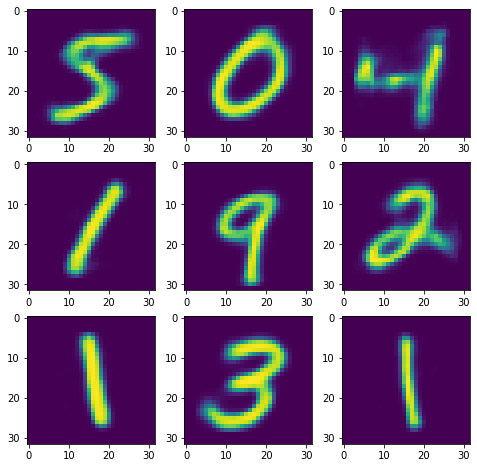

In [ ]:
fig = plt.figure(figsize=(8 , 8))
for i in range(9) : 
    fig.add_subplot(3 , 3 , i + 1) 
    plt.imshow(np.reshape(z[i] , (32 , 32)))

# Upsampling Autoencoder


In [ ]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers

In [ ]:
datasets = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
(xtrain , ytrain) , (xtest , ytest) = datasets

In [ ]:
xtrain = xtrain[: , : , : , None] / 255.0
xtest = xtest[: , : , : , None] / 255.0

In [ ]:
xtrain  = tf.image.resize(xtrain , (32 , 32))
xtest = tf.image.resize(xtest , (32 , 32))

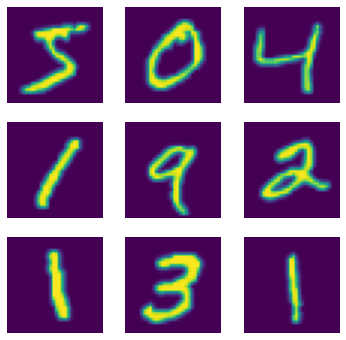

In [ ]:
fig = plt.figure(figsize = (6 , 6))

for i in range(9) : 
    fig.add_subplot(3 , 3 , i + 1)
    plt.imshow(np.reshape(xtrain[i] , (32 , 32)))
    plt.axis('off')

In [ ]:
print(xtrain.shape , xtest.shape)

(60000, 32, 32, 1) (10000, 32, 32, 1)


In [ ]:
#32 - 16 - 8 - 4 - 8 - 16 - 32 

In [ ]:
#encoder
encoder_inputs = tf.keras.Input(shape = (32 , 32 , 1))

encoded = layers.Conv2D(16 , (3 , 3) , padding = 'same' , activation = 'relu')(encoder_inputs) 
encoded = layers.MaxPool2D()(encoded)
# 16x16x16
encoded = layers.Conv2D(16 , (3 , 3) , padding = 'same' , activation = 'relu')(encoded) 
encoded = layers.MaxPool2D()(encoded)
# 8x8x16
encoded = layers.Conv2D(8 , (3 , 3) , padding = 'same' , activation = 'relu')(encoded) 
encoded = layers.MaxPool2D()(encoded)
# 4x4x8
encoder = tf.keras.Model(encoder_inputs , encoded)

In [ ]:
#decoder
decoder_inputs = tf.keras.Input(shape = (4 , 4 , 8))

decoded = layers.Conv2D(16 , (3 , 3) , padding = 'same' , activation = 'relu')(decoder_inputs) 
decoded = layers.UpSampling2D( (2 , 2) )(decoded)
# 8x8x16
decoded = layers.Conv2D(16 , (3 , 3) , padding = 'same' , activation = 'relu')(decoded) 
decoded = layers.UpSampling2D( (2 , 2) )(decoded)
# 16x16x16
decoded = layers.Conv2D(16 , (3 , 3) , padding = 'same' , activation = 'relu')(decoded) 
decoded = layers.UpSampling2D( (2 , 2) )(decoded)
# 32x32x16
decoded = layers.Conv2D(1 , (3 , 3) , padding = 'same' , activation = 'sigmoid')(decoded)

decoder = tf.keras.Model(decoder_inputs , decoded)

In [ ]:
inputs = tf.keras.Input(shape = (32 , 32 , 1))
outputs = decoder(encoder(inputs))

autoencoder = tf.keras.Model(inputs , outputs)
autoencoder.compile(loss = 'binary_crossentropy' , optimizer  = 'adam')

In [ ]:
autoencoder.fit(xtrain , xtrain , epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 18s 5ms/step - loss: 0.1449
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1197
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1158
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1135
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1113
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1106
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1100
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1094
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1090
Epoch 11/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1087
Epoch 12/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1084

In [ ]:
z = autoencoder.predict(xtrain)

1875/1875 [==============================] - 4s 2ms/step


In [ ]:
z.shape

(60000, 32, 32, 1)

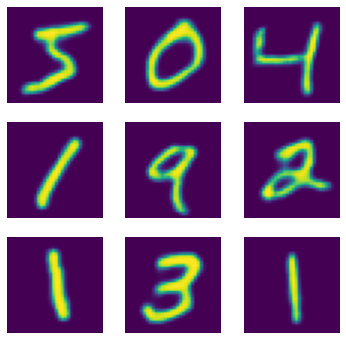

In [ ]:
fig = plt.figure(figsize = (6 , 6))

for i in range (9) :
    fig.add_subplot(3 , 3 , i + 1)
    plt.imshow(np.reshape(z[i] , (32 , 32)))
    plt.axis('off')

In [ ]:
z = encoder(xtrain)

In [ ]:
z.shape

TensorShape([60000, 4, 4, 8])

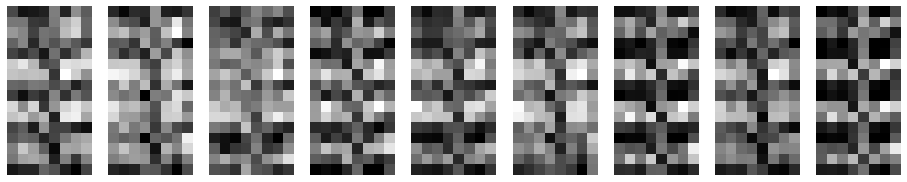

In [ ]:
z = np.reshape(z , (60000 , 16 , 8))

fig = plt.figure(figsize = (16 , 16))

for i in range (9) :
    fig.add_subplot(1 , 9 , i + 1)
    plt.imshow(z[i] , cmap = 'gray')
    plt.axis('off')

# Denoising Autoencoder

In [ ]:
xtrain_noisy = xtrain + np.reshape(np.random.uniform(0 , 0.1,  (60000* 32 *32)) ,(60000 , 32 , 32 , 1))

In [ ]:
z  = autoencoder.predict(xtrain_noisy)

1875/1875 [==============================] - 4s 2ms/step


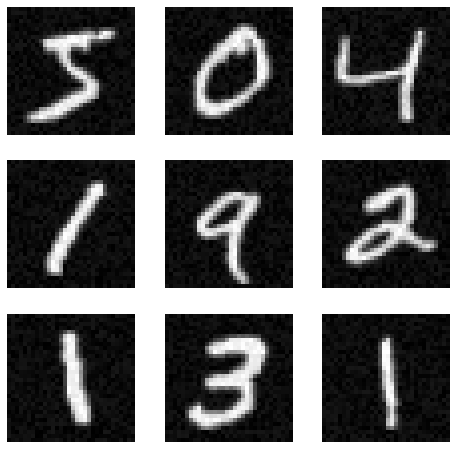

In [ ]:
fig = plt.figure(figsize=(8 , 8))
for i in range(9) : 
    fig.add_subplot(3 , 3 , i + 1) 
    plt.imshow(np.reshape(xtrain_noisy[i] , (32 , 32)) , cmap = 'gray' )
    plt.axis('off')

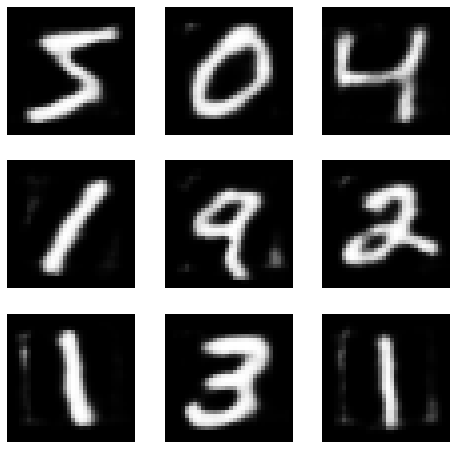

In [ ]:
fig = plt.figure(figsize=(8 , 8))
for i in range(9) : 
    fig.add_subplot(3 , 3 , i + 1) 
    plt.imshow(np.reshape(z[i] , (32 , 32)) , cmap = 'gray' )
    plt.axis('off')

# Segnet

In [107]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.keras.layers  as layers
import os

In [108]:
path_train = "/content/drive/MyDrive/Datasets/Lung Segmentation Dataset/train"
xtrain = []
ytrain = []
for file_name in os.listdir(path_train) : 
        if(file_name.endswith('.jpg')) :
            xtrain.append(plt.imread(os.path.join(path_train , file_name )))
            ytrain.append(plt.imread(os.path.join(path_train , file_name + '-msk.png')))

In [109]:
xtrain = np.array(xtrain)[: , : , : , None] / 255.0
ytrain = np.array(ytrain)[: , : , : , None]

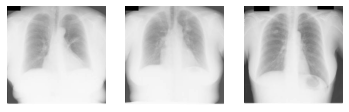

In [110]:
fig = plt.figure(figsize = (6 , 6))

for i in range(3) : 
    fig.add_subplot(1 , 3 , i + 1) 
    plt.imshow(np.reshape(xtrain[i] , (xtrain.shape[1] , xtrain.shape[2])) , cmap = 'gray' )
    plt.axis('off')

In [111]:
xtrain.shape

(6, 256, 256, 1)

In [112]:
autoencoder = [

    layers.Conv2D(64 , (3 , 3) , padding = 'same' , activation = 'relu' , input_shape = (256 , 256 , 1)) ,
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(128 , (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(256 , (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.MaxPool2D(),
    layers.Conv2D(512 , (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.MaxPool2D(),

    layers.Conv2D(512 , (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.UpSampling2D(),
    layers.Conv2D(256 , (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.UpSampling2D(),
    layers.Conv2D(128 , (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.UpSampling2D(),
    layers.Conv2D(64, (3 , 3) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),
    layers.UpSampling2D(),

    layers.Conv2D(1 , (1 , 1) , padding = 'same' , activation = 'relu') ,
    layers.BatchNormalization(),

]

segnet = tf.keras.Sequential(autoencoder , )
segnet.compile(loss = 'mse' , optimizer = 'adam')

In [128]:
segnet.fit(xtrain , ytrain , epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 119ms/step - loss: 0.0037
Epoch 2/500
1/1 [==============================] - 0s 104ms/step - loss: 0.0037
Epoch 3/500
1/1 [==============================] - 0s 100ms/step - loss: 0.0037
Epoch 4/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0037
Epoch 5/500
1/1 [==============================] - 0s 82ms/step - loss: 0.0037
Epoch 6/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0037
Epoch 7/500
1/1 [==============================] - 0s 79ms/step - loss: 0.0037
Epoch 8/500
1/1 [==============================] - 0s 84ms/step - loss: 0.0037
Epoch 9/500
1/1 [==============================] - 0s 87ms/step - loss: 0.0037
Epoch 10/500
1/1 [==============================] - 0s 83ms/step - loss: 0.0037
Epoch 11/500
1/1 [==============================] - 0s 80ms/step - loss: 0.0037
Epoch 12/500
1/1 [==============================] - 0s 81ms/step - loss: 0.0037
Epoch 13/500
1/1 [============================

In [129]:
path_test = "/content/drive/MyDrive/Datasets/Lung Segmentation Dataset/test"
xtest= []
ytest = []
for file_name in os.listdir(path_test) : 
        if(file_name.endswith('.jpg')) :
            xtest.append(plt.imread(os.path.join(path_test , file_name )))
            ytest.append(plt.imread(os.path.join(path_test , file_name + '-msk.png')))

In [130]:
xtest = np.array(xtest)[ : , : , : , None] /255.0
ytest = np.array(ytest)[: , : , : , None]

In [131]:
z = segnet(xtest)

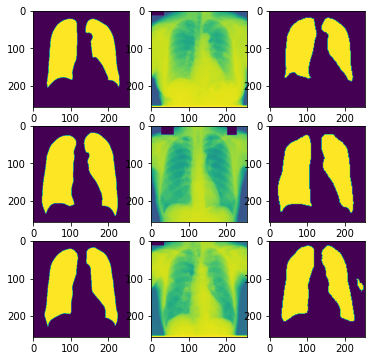

In [132]:
fig = plt.figure(figsize = (6 , 6))

for i in range(3) : 
    fig.add_subplot(3 , 3 , (i + 1) * 3 - 2) 
    plt.imshow(ytest[i][ : , : , 0] > 0.5 )

    fig.add_subplot(3 , 3 , (i + 1) * 3 - 1 ) 
    plt.imshow(xtest[i][ : , : , 0]  )

    fig.add_subplot(3 , 3 , (i + 1) * 3  ) 
    plt.imshow(z[i][ : , : , 0] > 0.5 )